# Exploratory Data Analysis

In energy demand forecasting there are several factors that can impact on demand and hence the forecasting. In this analysis for demand forecasting we consider several factors as features such as temperature, seasons, price of energy, holiday and several timeseries factors which could potentially impact energy demand. We tried to discover and investigate target and features relationship in this part of analysis.

In [20]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
#import plotly.express as px 

from calendar import month_abbr as months
from statsmodels.tsa.seasonal import seasonal_decompose


#from window_ops.rolling import rolling_mean, rolling_max, rolling_min

import warnings
warnings.filterwarnings("ignore")

In [21]:
# Read the data into dataframe
demand_temp = pd.read_csv('../../../data/demand_temp.csv')
#df.dtypes # DATETIME is object
# convert 'DATETIME' to a datetime object
demand_temp['DATETIME'] = pd.to_datetime(demand_temp['DATETIME'])

In [22]:
# Set index
demand_temp_copy = demand_temp.copy()
demand_temp_idx = demand_temp_copy.set_index('DATETIME')

In [23]:
# Create time series features based on time series index
def create_features(df):
    df['YEAR'] = df.index.year
    df['MONTH'] = df.index.month
    df['DAY_OF_WEEK'] = df.index.dayofweek
    df['DAY'] = df.index.day
    df['HOUR'] = df.index.hour
    df['HALF_HOUR'] = df.index.minute//30
    
    return df

In [24]:
# Create timeseries features
demand_temp_features = demand_temp_idx.copy()
demand_temp_features = create_features(demand_temp_features)

### For energy Demand and Temperature
To observe the distribution of NSW energy demand a density curve of total energy demand is plotted.

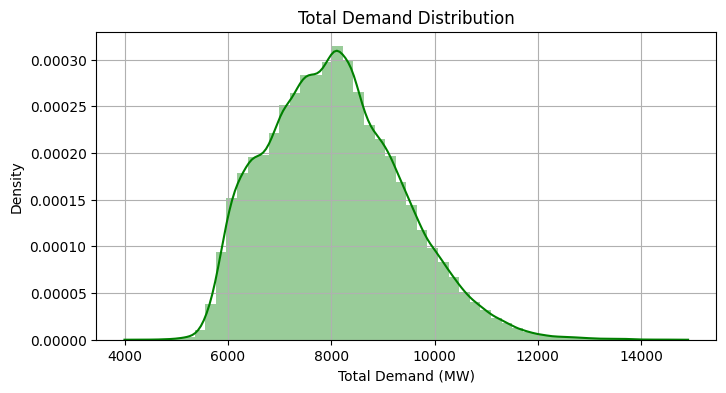

In [25]:
# Density curve of total energy demand
plt.figure(figsize=(8, 4))
sns.distplot(demand_temp['TOTALDEMAND'], kde=True, color='green')
plt.xlabel("Total Demand (MW)")
plt.title("Total Demand Distribution")
plt.grid()
plt.show()

The distribution of energy demand is not symmetric. It has an extended right tail which exceeds 14500 MW of demand, indicates that there are occational or rare event when demand is significantly higher than the average demand. This density curve implies that energy provider and grid operators need to be prepared for such rare but high demand situation. In order to maintain a stable supply of energy they may need to have additional capacity in place. 

Now to observe the distribution of NSW tenperature a density curve of temperature is plotted.

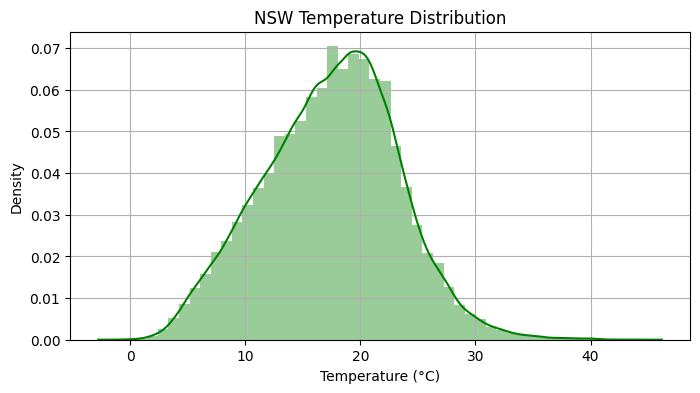

In [26]:
# Density curve of total energy demand
plt.figure(figsize=(8, 4))
sns.distplot(demand_temp['TEMPERATURE'], kde=True, color='green')
plt.xlabel("Temperature (°C)")
plt.title("NSW Temperature Distribution")
plt.grid()
plt.show()

In the distribution of temperature a lack of symmetry is observed which is right skewed. It's long tail to the right suggest that most of the data points (lower temperatureares) are less than it's mean temperature 17.40°C, concenrated to the left and a few number of data points (higher temperatures i.g. some extreme high-temperature outliers) are extending out to the right. 

#### Relationship between energy demand and temperature

The weather variables such as temperature, rainfall, solar exposure, wind speed and humidity, may have significant impact on energy demand. The interdependency between weather variables are vary complex. But in all, Temperature is the key influential climatic variable because it controls the atmospheric conditions. So temperature has the most important impact on energy demand (Dao Hoang Vu, Kashem M. Muttaqi 2014, sec. 2, par A.)

Grraphs of observed energy demand and temperature are plotted and also a Pearson correlation coefficient is measured to see if there is any linear relationship between temperature and energy demand.

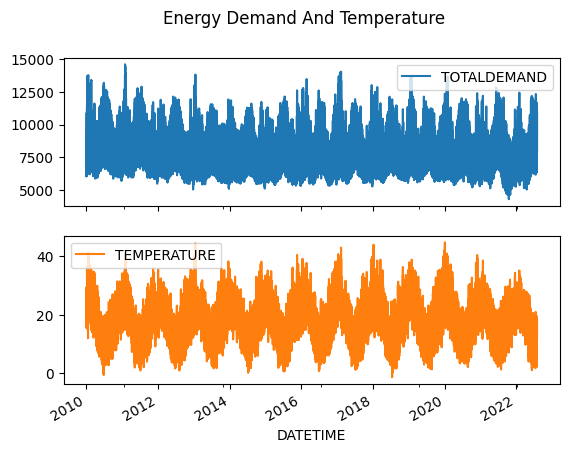

In [27]:
# Plot energy demand and temperature against year
demand_temp_idx[['TOTALDEMAND', 'TEMPERATURE']].plot(subplots=True, title='Energy Demand And Temperature')
plt.show()

In [28]:
# calculate pearson correlation coefficient between energy demand and temperature
demand_temp_cor = demand_temp[['TEMPERATURE','TOTALDEMAND']].corr()
print("Correlation coefficient:\n", demand_temp_cor) # 0.114347

Correlation coefficient:
              TEMPERATURE  TOTALDEMAND
TEMPERATURE     1.000000     0.114347
TOTALDEMAND     0.114347     1.000000


From the comparision of energy demand and temperature in Figure-3 it is observed that There is high demand in energy consumption when temperature gets higher or reaches in its low. The correlation coefficient between them is 0.114 which suggests a very weak linear relationship. But it is evident that tempeature greatly affect demand, may be the relationship is non linear. To find out the pattern of rlationship a scatter plot can be considered.

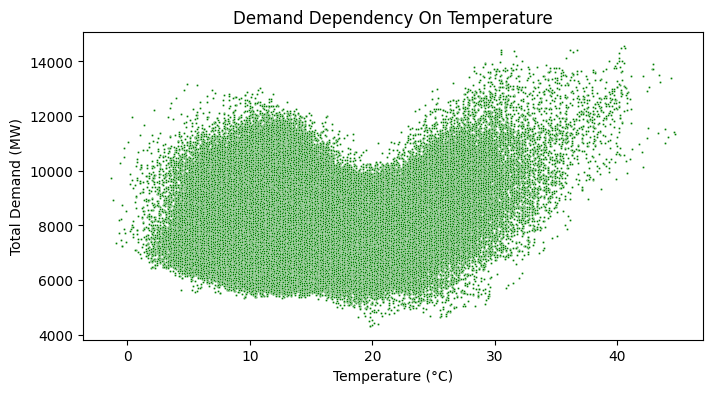

In [39]:
# scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot (x=demand_temp.TEMPERATURE, y=demand_temp.TOTALDEMAND, data=demand_temp, marker=".",s=10, color='green')
ax.set_title('Demand Dependency On Temperature')
ax.set(xlabel='Temperature (°C)', ylabel='Total Demand (MW)')
plt.show()

The demand dependency on temperature in Figure-4 clearly exibits a cuvature pattern which indicates a non linear relationship between demand and temperature.

#### Components of timeseries: Seasonality and Trend
Seasonality is a variation that occurs at specific regular intervals of less than a year (e.g. daily, weekly, monthly, or annually) and trend is the presence of a long term increase or decrease in the sequence of data. In this part of analyis given the datetime we tried to identify if there is a presence of seasonality, treand and stationarity in the NSW historical energy demand and temperature data. 

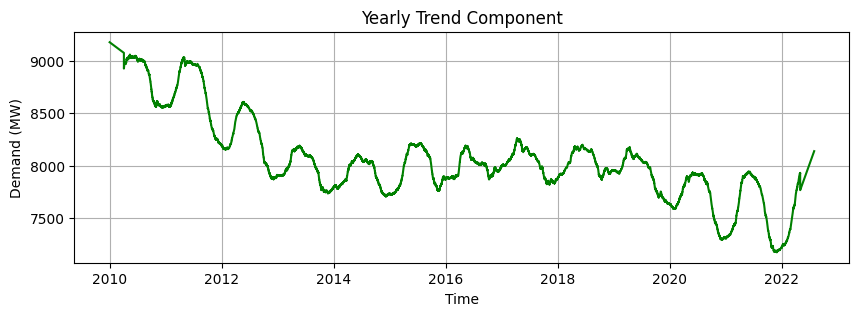

In [30]:
ANNUAL_PERIOD = 365 * 24
mult_decomp = seasonal_decompose(demand_temp_idx['TOTALDEMAND'], model='multiplicative', extrapolate_trend='freq', period=ANNUAL_PERIOD)

# Plot only the trend component
plt.figure(figsize=(10, 3))
plt.title('Yearly Trend Component')
plt.plot(mult_decomp.trend, color='green')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Demand (MW)')
plt.show()

From the trend component in figure-5, the demand for energy follows a downtrend since the year 2010 which supports the staistics that the energy consumption in NSW has decreased by 2% over the past 10 years (NSW State of Environment (2022)). But in each year there is a regular ups and down in demand which indicates presence of seasonality. For further investigation, we can break it into monthly and daily demand and can be represented in graphs.

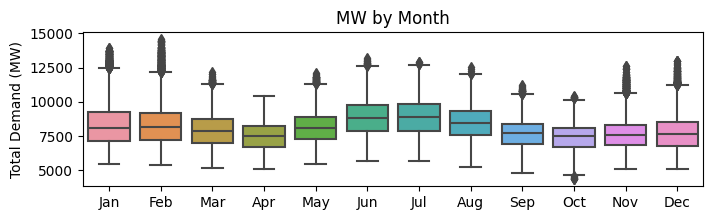

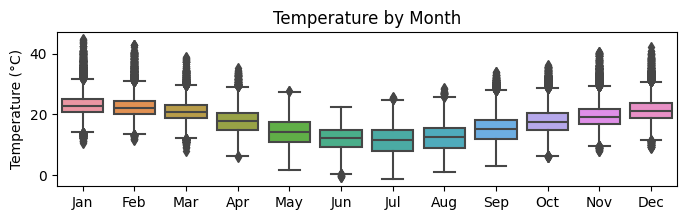

In [31]:
# get month names; for renaming the xticklabels
months = list(months)[1:]

# plot monthly energy demand
fig, ax = plt.subplots (figsize=(8, 2))
sns.boxplot(data=demand_temp_features, x = 'MONTH', y = 'TOTALDEMAND')
ax.set(xlabel='', ylabel='Total Demand (MW)', xticklabels=months) # xlabel='Month'
ax.set_title('MW by Month')

# plot monthly temperature
fig, ax = plt.subplots (figsize=(8, 2))
sns.boxplot(data=demand_temp_features, x = 'MONTH', y = 'TEMPERATURE')
ax.set(xlabel='', ylabel='Temperature (°C)', xticklabels=months) # xlabel='Month'
ax.set_title('Temperature by Month')

plt.show()

In Australia the winter has three coldest months June, July and August. Summdr has the three hottest months December, January and February. Spring has three transition months September, October and November. Autumn lasts for three months March, April and May. The monthly energy demand in figure-6 shows that during the Summer and winter the energy demand reaches to its pick as people more frequently use air-conditioning in summer and heating system in winter. But in Spring and Autumn energy demand reaches to its low because during this months of the season temperature remains stable, not too hot and not too cold, so less need to run heating or cooling equipment.

The amount of energy being used - affected by many factors, but mostly by temperature and time of the day.

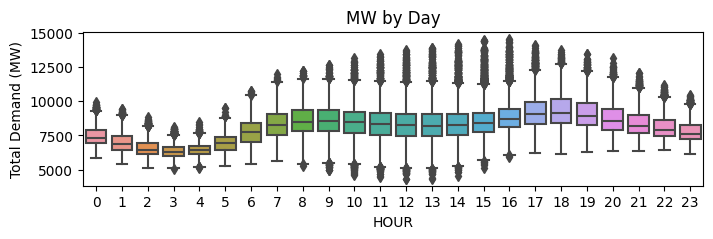

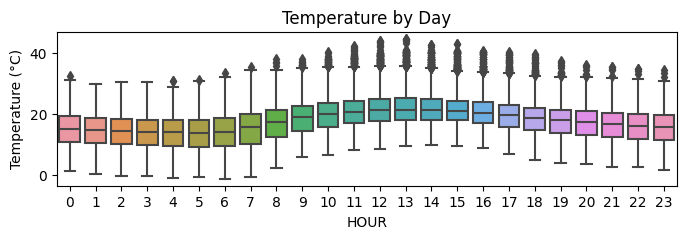

In [32]:
# plot hourly energy demand
fig, ax = plt.subplots (figsize=(8, 2))
sns.boxplot(data=demand_temp_features, x = 'HOUR', y = 'TOTALDEMAND')
ax.set(ylabel='Total Demand (MW)')
ax.set_title('MW by Day')

# plot hourly temperature
fig, ax = plt.subplots (figsize=(8, 2))
sns.boxplot(data=demand_temp_features, x = 'HOUR', y = 'TEMPERATURE')
ax.set(ylabel='Temperature (°C)')
ax.set_title('Temperature by Day')

plt.show()

From Figure-8 and 9, on an average day, we observe the energy demand gradually increases through the daytime as temperature outside increases. The demand picks at around 6pm as people start getting home and use appliances when home. As the sun and temperature go down demand starts dropping off and reaches to its low between 2 and 3am in the morning because air-conditioning or heating equipment are not running as often. 

#### Relationship between NSW population growth and energy demand

We assume that population has effect on energy demand, therefore, if population increase then energy demand will increase too. To find out taht, we fit a regression line of energy deamnd against estimated resident population.

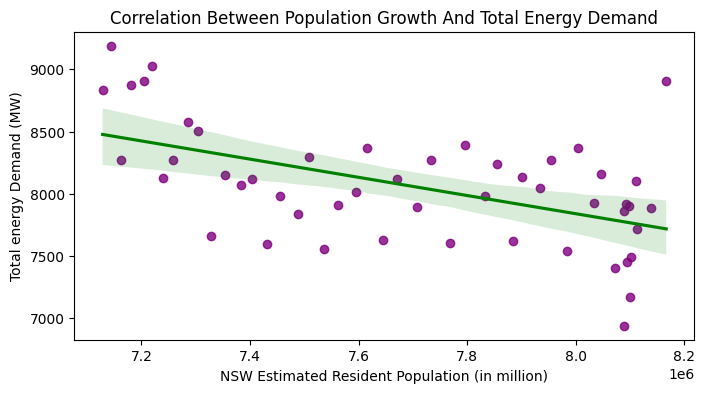

In [33]:
demand_pop = pd.read_csv('../../../data/demand_population.csv')

# Set the figure size
plt.figure(figsize=(8, 4))  # Making the plot wider and taller

# Create a scatter plot with regression line
sns.regplot(x='Estimated Resident Population', y='TOTALDEMAND', data=demand_pop,
            scatter_kws={'color': 'purple'},  # Setting scatter plot color to purple
            line_kws={'color': 'green'})  # Setting line color to green

# Add labels and title
plt.xlabel('NSW Estimated Resident Population (in million)')
plt.ylabel('Total energy Demand (MW)')
plt.title('Correlation Between Population Growth And Total Energy Demand')

# Show the plot
plt.show()


In [34]:
# Calculate the correlation between 'TOTALDEMAND' and 'Estimated Resident Population'
demand_pop_corr = demand_pop[['TOTALDEMAND', 'Estimated Resident Population' ]].corr()
print("correlation between Total energy demand and Estimated Resident Population:\n ", demand_pop_corr)


correlation between Total energy demand and Estimated Resident Population:
                                 TOTALDEMAND  Estimated Resident Population
TOTALDEMAND                       1.000000                      -0.529031
Estimated Resident Population    -0.529031                       1.000000


As it is observed in in Figure-10, the fitted regression line of energy demand has a down trend, demand decreases as the population grows which also implies negative correalation. The calculated correlation is -0.53. For several reason energy demand and population growth can exhibit negative correlation. Improved energy efficient technology and infrastructure- advanced appliances and industrial processes can significantly reduces the energy demand even if the population grows. Shifts to new energy sources- shifts from fossil fuel to more cleaner and efficient energy sources such as renewable energy can significantly reduce the energy demand.

#### Relationship between energy demand and energy price

To investigate the relationship between energy deamnd and its price we fit a regression line of energy deamnd against energy price.

In [35]:
# Read the data into dataframe
final_df = pd.read_csv('../../../data/merged_TempDemandRRPHoliday.csv')
final_df['DATETIME'] = pd.to_datetime(final_df['DATETIME'])

# sort datetime in ascending orders
final_df = final_df.sort_values(by=['DATETIME']) #, inplace=True)

# drop the rows that has RRP -1000 0r above
final_df= final_df[final_df['RRP'] > -1000]

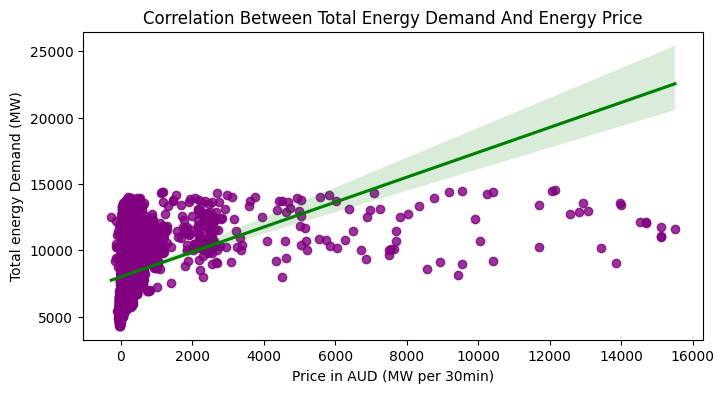

In [36]:
# Set the figure size
plt.figure(figsize=(8, 4))  # Making the plot wider and taller

# Create a scatter plot with regression line
sns.regplot(x='RRP', y='TOTALDEMAND', data=final_df, 
            scatter_kws={'color': 'purple'},  # Setting scatter plot color to purple
            line_kws={'color': 'green'})  # Setting line color to green

# Add labels and title
plt.xlabel('Price in AUD (MW per 30min)')
plt.ylabel('Total energy Demand (MW)')
plt.title('Correlation Between Total Energy Demand And Energy Price')

# Show the plot
plt.show()

In [37]:
demand_price_corr = final_df[['TOTALDEMAND', 'RRP' ]].corr()
print("Correlation between total energy demand and energy price:\n ", demand_price_corr)

Correlation between total energy demand and energy price:
               TOTALDEMAND       RRP
TOTALDEMAND     1.000000  0.134534
RRP             0.134534  1.000000


The fitted regression line of energy demand in figure-10 follows an uptrend which also implies positive correlation between energy demand and its price. The calculated correlation coefficient is 0.1345 implies a weak positive correlation. There are several reasons for which energy demand could increase even though price increases. For example, limited alternative to reduce the energy consumption in short term period, Seasonal and Weather effect- regardless of the price people are to consume more energy during winter and summer, income and economic growth leads to higher consumption of energy even if the price increases.

#### Relationship between energy demand and Holiday
Most often people are away from home while on holidays which results in less consumption of energy. It is observed in figure-11, energy demand tends to go higher when no holiday.

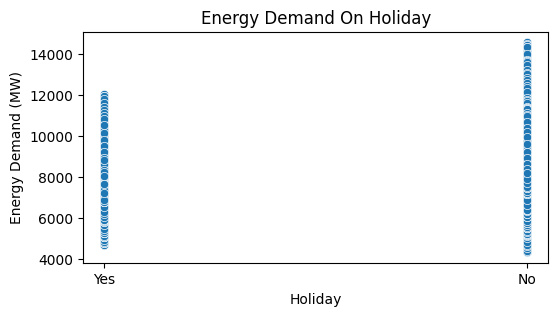

In [38]:
# convert Holiday column into string for plotting purpose
final_df['isHoliday'] = final_df['isHoliday'].astype(str)

fig, ax = plt.subplots (figsize=(6, 3))
sns.scatterplot(data=final_df, x="isHoliday", y="TOTALDEMAND")

ax.set(xlabel='Holiday', ylabel='Energy Demand (MW)', xticklabels=['Yes', 'No'])
ax.set_title('Energy Demand On Holiday')
plt.show()

# References

Identifying trend and seasonality
https://subscription.packtpub.com/book/data/9781801819626/2/ch02lvl1sec11/identifying-trend-and-seasonality

Dao Hoang Vu, Kashem M. Muttaqi, Ashish P. Agalgaonkar, 1-1-2014, 'Assessing the influence of climatic variables on electricity demand', *University of Wollongong Research Online*, accessed 29 Sep 2023, <https://ro.uow.edu.au/cgi/viewcontent.cgi?referer=&httpsredir=1&article=4909&context=eispapers>.

NSW State of Environment (2022), *"Energy Consumption"*, accessed 30 Sep 2023,
https://www.soe.epa.nsw.gov.au/all-themes/human-settlement/energy-consumption#final-energy-consumption-status-and-trends
